In [ ]:
from datetime import datetime
import os
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', 600)

# -*- encoding: utf-8 -*-
%matplotlib inline

In [ ]:
def get_table(filename):
    if os.path.isfile(filename):
        df = pd.read_csv(filename, index_col='date')
        return df

In [ ]:
filename = '/content/S&P 500 Historical Components & Changes.csv'
df = get_table(filename)
# df.head()

In [ ]:
# Convert ticker column from csv to list, then sort.
df['tickers'] = df['tickers'].apply(lambda x: sorted(x.split(',')))
# df.tail()

In [ ]:
# Replace SYMBOL-yyyymm with SYMBOL.
df['tickers'] = [[ticker.split('-')[0] for ticker in tickers] for tickers in df['tickers']]
# df.head()

In [ ]:
# Remove duplicates in each row.
df['tickers'] = [sorted(list(set(tickers))) for tickers in df['tickers']]
df.tail()
# num = []
# for i, row in df.iterrows():
#     l = list(row['tickers'])
#     num.append(len(l))
#     print(i, len(l))
# pd.Series(num).describe()

,tickers
date,
2025-10-30,"[A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD..."
2025-10-31,"[A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD..."
2025-11-03,"[A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD..."
2025-11-04,"[A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD..."
2025-11-11,"[A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD..."


In [ ]:
# Ensure index is datetime
df.index = pd.to_datetime(df.index)

# Extract year from the index
df['year'] = df.index.year

# Get the first available date for each year
first_dates_per_year = df.groupby('year').apply(lambda x: x.index.min())

# Filter to keep only these first-of-year records
df_yearly = df[df.index.isin(first_dates_per_year)].copy()

# Drop the temporary year column
df_yearly = df_yearly.drop('year', axis=1)

# Display the result
print(df_yearly)

                                                      tickers
date                                                         
1996-01-02  [AAL, AAMRQ, AAPL, ABI, ABS, ABT, ABX, ACKH, A...
1997-01-02  [AAL, AAMRQ, AAPL, ABI, ABS, ABT, ABX, ACKH, A...
1998-01-02  [AAMRQ, AAPL, ABI, ABS, ABT, ABX, ACKH, ACV, A...
1999-01-04  [AAMRQ, AAPL, ABI, ABS, ABT, ABX, ACKH, ACV, A...
2000-01-03  [AABA, AAMRQ, AAPL, ABI, ABS, ABT, ABX, ACKH, ...
2001-01-02  [A, AABA, AAMRQ, AAPL, ABI, ABKFQ, ABS, ABT, A...
2002-01-02  [A, AABA, AAMRQ, AAPL, ABC, ABI, ABKFQ, ABS, A...
2003-01-06  [A, AABA, AAMRQ, AAPL, ABC, ABI, ABKFQ, ABS, A...
2004-01-07  [A, AABA, AAPL, ABC, ABI, ABKFQ, ABS, ABT, ACV...
2005-01-06  [A, AABA, AAPL, ABC, ABI, ABKFQ, ABS, ABT, ACS...
2006-01-03  [A, AABA, AAPL, ABC, ABI, ABKFQ, ABS, ABT, ACS...
2007-01-03  [A, AABA, AAPL, ABC, ABI, ABKFQ, ABT, ACS, ADB...
2008-01-02  [A, AABA, AAPL, ABC, ABI, ABKFQ, ABT, ACAS, AC...
2009-01-02  [A, AABA, AAPL, ABC, ABT, ACAS, ACS, ADBE, ADI...
2010-01-

/tmp/ipython-input-4041893751.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  first_dates_per_year = df.groupby('year').apply(lambda x: x.index.min())


In [ ]:
# Ensure datetime index and sort
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Initialize lists to store changes
additions = []
removals = []

# Iterate through consecutive dates to find changes
for i in range(1, len(df)):
    current_date = df.index[i]
    previous_date = df.index[i-1]

    current_tickers = set(df.iloc[i]['tickers'])
    previous_tickers = set(df.iloc[i-1]['tickers'])

    # Find additions (in current but not previous)
    added = list(current_tickers - previous_tickers)
    for ticker in added:
        additions.append({'date': current_date, 'ticker': ticker, 'action': 'added'})

    # Find removals (in previous but not current)
    removed = list(previous_tickers - current_tickers)
    for ticker in removed:
        removals.append({'date': current_date, 'ticker': ticker, 'action': 'removed'})

# Create DataFrames
df_added = pd.DataFrame(additions)
df_removed = pd.DataFrame(removals)

# Combine into one changes DataFrame
df_changes = pd.merge(df_added, df_removed, on="date",)
df_changes = df_changes.sort_values('date')

# print("All Changes:")
# print(df_changes.head(10))

# If you want separate DataFrames
# print("\nAdditions:")
# print(df_added.head())

# print("\nRemovals:")
# print(df_removed.head())

In [ ]:
df_changes['quarter_num'] = df_changes['date'].dt.quarter

In [ ]:
df_changes

,date,ticker_x,action_x,ticker_y,action_y,quarter_num
0,1996-01-22,CSE,added,BCO,removed,1
1,1996-02-12,BAY,added,CCB,removed,1
2,1996-03-08,FITB,added,HDLM,removed,1
3,1996-03-13,GNT,added,FBO,removed,1
4,1996-03-28,EMC,added,CYR,removed,1
...,...,...,...,...,...,...
1087,2025-09-22,EME,added,CZR,removed,3
1086,2025-09-22,EME,added,ENPH,removed,3
1085,2025-09-22,EME,added,MKTX,removed,3
1088,2025-09-22,HOOD,added,MKTX,removed,3


## CODE

In [ ]:
year  = 2019

In [ ]:
# tickers at the first valid date of the year
tickers_at_start_of_year = df_yearly.loc[df_yearly.index.year == year, 'tickers'].values[0]

In [ ]:
len(tickers_at_start_of_year)

505

In [ ]:
ticker_changes = df_changes[(df_changes['date'] >= str(year)+'-01-01') & (df_changes['date'] <= str(year)+'-12-31')]
ticker_changes.head()

,date,ticker_x,action_x,ticker_y,action_y,quarter_num
822,2019-01-02,FRC,added,SCG,removed,1
823,2019-01-18,TFX,added,PCG,removed,1
824,2019-02-15,ATO,added,NFX,removed,1
825,2019-02-27,WAB,added,GT,removed,1
826,2019-04-02,DOW,added,BHF,removed,2


In [ ]:
ticker_changes.head()

,date,ticker_x,action_x,ticker_y,action_y,quarter_num
822,2019-01-02,FRC,added,SCG,removed,1
823,2019-01-18,TFX,added,PCG,removed,1
824,2019-02-15,ATO,added,NFX,removed,1
825,2019-02-27,WAB,added,GT,removed,1
826,2019-04-02,DOW,added,BHF,removed,2


In [ ]:
added_dict = (ticker_changes.groupby('quarter_num')['ticker_x'].apply(list).to_dict())
removed_dict = (ticker_changes.groupby('quarter_num')['ticker_y'].apply(list).to_dict())

In [ ]:
added_dict

{1: ['FRC', 'TFX', 'ATO', 'WAB'],
 2: ['DOW', 'LHX', 'CTVA', 'CTVA', 'DD', 'DD', 'AMCR'],
 3: ['MKTX', 'TMUS', 'GL', 'IEX', 'IEX', 'LDOS', 'LDOS', 'CDW', 'NVR'],
 4: ['LVS',
  'BKR',
  'NLOK',
  'NLOK',
  'PEAK',
  'PEAK',
  'NOW',
  'WRB',
  'WRB',
  'VIAC',
  'VIAC',
  'TFC',
  'TFC',
  'ODFL',
  'ODFL',
  'J',
  'ZBRA',
  'ZBRA',
  'ZBRA',
  'LYV',
  'STE',
  'LYV',
  'LYV',
  'STE',
  'STE']}

In [ ]:
added_tickers_list = ticker_changes["ticker_x"].tolist()

In [ ]:
wrds_tickers_list = list(set(tickers_at_start_of_year + added_tickers_list))
wrds_tickers_list.sort()
len(wrds_tickers_list)

533

In [ ]:
# write tickers to a text file
with open(f'/content/sp500_tickers_{year}.txt', 'w') as f:
    for ticker in wrds_tickers_list:
        f.write(f"{ticker}\n")

In [ ]:
# now get file from wrds (fundamental )
file_path = f"/content/sp500_cleaned_{year}.csv"
dd = pd.read_csv(file_path)
wrds_dwnld = dd["ticker"].unique().tolist()

In [ ]:
wrds_tickers_file = file_path
wrds_file = pd.read_csv(wrds_tickers_file)
wrds_file.head()

,date,ticker,gvkey,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,SMA_3,SMA_6,vol_3m,vol_6m,EMA_3,EMA_6,RVOL_3,RVOL_6,vol_ROC,vol_mom
0,2019-01-31,A,126554.0,50.384,0.225,18.638,27.455,27.857,78.402,78.402,...,0.058810,0.027008,0.109594,0.088492,0.058355,0.034926,0.847214,0.845135,-0.120455,0.107880
1,2019-02-28,A,126554.0,52.478,0.225,18.638,28.679,29.099,81.897,81.897,...,0.034774,0.030652,0.097830,0.088730,0.051466,0.037683,0.826806,0.735138,-0.186983,0.036856
2,2019-03-31,A,126554.0,57.514,0.208,19.593,29.018,29.336,22.706,22.706,...,0.061248,0.025221,0.059528,0.088716,0.031649,0.030297,0.869038,0.676080,-0.090579,0.010283
3,2019-04-30,A,126554.0,56.169,0.208,19.593,28.339,28.650,22.175,22.175,...,0.011007,0.034909,0.033990,0.077149,0.004130,0.014959,1.125157,0.927769,0.260042,-0.026316
4,2019-05-31,A,126554.0,47.746,0.208,19.593,24.206,24.471,18.941,18.941,...,-0.052472,-0.008849,0.082771,0.094087,-0.070865,-0.030990,1.528224,1.637901,0.862417,-0.222907


In [ ]:
quater_map = {1: str(year)+'-03-31', 2: str(year)+'-06-30', 3: str(year)+'-09-30', 4: str(year)+'-12-31'}

In [ ]:
import pandas as pd

# Example: quarter end dates
quarter_map = {1: str(year)+'-03-31', 2: str(year)+'-06-30', 3: str(year)+'-09-30', 4: str(year)+'-12-31'}

# Ensure 'date' column is datetime
wrds_file['date'] = pd.to_datetime(wrds_file['date'])

for quarter in range(1,5):
    added_this_quarter = added_dict.get(quarter, [])
    removed_this_quarter = removed_dict.get(quarter, [])

    # Get the quarter start date
    if quarter == 1:
        quarter_start = pd.to_datetime(f'{year}-01-01')
    elif quarter == 2:
        quarter_start = pd.to_datetime(f'{year}-04-01')
    elif quarter == 3:
        quarter_start = pd.to_datetime(f'{year}-07-01')
    else:
        quarter_start = pd.to_datetime(f'{year}-10-01')

    # Remove tickers in added_this_quarter for months BEFORE quarter_start
    wrds_file = wrds_file[~((wrds_file['ticker'].isin(added_this_quarter)) & (wrds_file['date'] < quarter_start))]
    wrds_file = wrds_file[~((wrds_file['ticker'].isin(removed_this_quarter)) & (wrds_file['date'] > quarter_start))]
    # print(f"Q{quarter} {year}: Added {len(added_this_quarter)} tickers, Removed {len(removed_this_quarter)} tickers")


In [ ]:
wrds_file["ticker"].nunique()

427

In [ ]:
import os

# Create the directory if it doesn't exist
os.makedirs('/content/Data', exist_ok=True)

wrds_file.to_csv(f"/content/sp500_cleaned_{year}.csv", index=False)
# after saving, use data_cleaning.ipynb to clean and merge with price data

In [ ]:
df=pd.read_csv(f'/content/sp500_cleaned_{year}.csv')
df.head()

,date,ticker,gvkey,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,SMA_3,SMA_6,vol_3m,vol_6m,EMA_3,EMA_6,RVOL_3,RVOL_6,vol_ROC,vol_mom
0,2019-01-31,A,126554.0,50.384,0.225,18.638,27.455,27.857,78.402,78.402,...,0.058810,0.027008,0.109594,0.088492,0.058355,0.034926,0.847214,0.845135,-0.120455,0.107880
1,2019-02-28,A,126554.0,52.478,0.225,18.638,28.679,29.099,81.897,81.897,...,0.034774,0.030652,0.097830,0.088730,0.051466,0.037683,0.826806,0.735138,-0.186983,0.036856
2,2019-03-31,A,126554.0,57.514,0.208,19.593,29.018,29.336,22.706,22.706,...,0.061248,0.025221,0.059528,0.088716,0.031649,0.030297,0.869038,0.676080,-0.090579,0.010283
3,2019-04-30,A,126554.0,56.169,0.208,19.593,28.339,28.650,22.175,22.175,...,0.011007,0.034909,0.033990,0.077149,0.004130,0.014959,1.125157,0.927769,0.260042,-0.026316
4,2019-05-31,A,126554.0,47.746,0.208,19.593,24.206,24.471,18.941,18.941,...,-0.052472,-0.008849,0.082771,0.094087,-0.070865,-0.030990,1.528224,1.637901,0.862417,-0.222907


In [ ]:
import pandas as pd

# Read all files
df_2014 = pd.read_csv('/content/sp500_cleaned_2014.csv')
df_2015 = pd.read_csv('/content/sp500_cleaned_2015.csv')
df_2016 = pd.read_csv('/content/sp500_cleaned_2016.csv')
df_2017 = pd.read_csv('/content/sp500_cleaned_2017.csv')
df_2018 = pd.read_csv('/content/sp500_cleaned_2018.csv')
df_2019 = pd.read_csv('/content/sp500_cleaned_2019.csv')
df_2020 = pd.read_csv('/content/sp500_cleaned_2020.csv')
df_2021 = pd.read_csv('/content/sp500_cleaned_2021.csv')
df_2022 = pd.read_csv('/content/sp500_cleaned_2022.csv')
df_2023 = pd.read_csv('/content/sp500_cleaned_2023.csv')
df_2024 = pd.read_csv('/content/sp500_cleaned_2024.csv')

# Concatenate vertically (stack rows)
combined_df = pd.concat([df_2019,df_2020, df_2021, df_2022, df_2023, df_2024],
                        ignore_index=True)

# Sort by date and stock ticker (important!)
combined_df['date'] = pd.to_datetime(combined_df['date'])

combined_df = combined_df.sort_values(['ticker', 'date'])
combined_df['return']=combined_df.groupby('ticker')['price'].pct_change()

# Save combined file
combined_df.to_csv('combined_data.csv', index=False)

In [ ]:
combined_df.head()

,date,ticker,gvkey,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,...,SMA_6,vol_3m,vol_6m,EMA_3,EMA_6,RVOL_3,RVOL_6,vol_ROC,vol_mom,return
0,2019-01-31,A,126554.0,50.384,0.225,18.638,27.455,27.857,78.402,78.402,...,0.027008,0.109594,0.088492,0.058355,0.034926,0.847214,0.845135,-0.120455,0.107880,NaN
1,2019-02-28,A,126554.0,52.478,0.225,18.638,28.679,29.099,81.897,81.897,...,0.030652,0.097830,0.088730,0.051466,0.037683,0.826806,0.735138,-0.186983,0.036856,0.044576
2,2019-03-31,A,126554.0,57.514,0.208,19.593,29.018,29.336,22.706,22.706,...,0.025221,0.059528,0.088716,0.031649,0.030297,0.869038,0.676080,-0.090579,0.010283,0.011833
3,2019-04-30,A,126554.0,56.169,0.208,19.593,28.339,28.650,22.175,22.175,...,0.034909,0.033990,0.077149,0.004130,0.014959,1.125157,0.927769,0.260042,-0.026316,-0.023389
4,2019-05-31,A,126554.0,47.746,0.208,19.593,24.206,24.471,18.941,18.941,...,-0.008849,0.082771,0.094087,-0.070865,-0.030990,1.528224,1.637901,0.862417,-0.222907,-0.145860


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION
# ============================================================================
RETURN_COLUMN = 'return'  # Column containing monthly returns
TOP_BOTTOM_N = [10,25,50]  # Number of stocks for top/bottom portfolios
RISK_FREE_RATE_ANNUAL = 0.035  # 3.5% annual risk-free rate
ANALYSIS_END_DATE = '2024-12-31'  # End of analysis period

# Transaction cost estimates (as % of portfolio value per rebalance)
TRANSACTION_COSTS = {
    'annually': 0.005,   # 0.5% per rebalance
    'quarterly': 0.007,  # 0.7% per rebalance
    'monthly': 0.010     # 1.0% per rebalance
}

# Columns to exclude from factor analysis
EXCLUDE_COLUMNS = ['date', 'gvkey', 'cusip', 'volume', 'price'] # Added volume/price to exclude from factor list

# ============================================================================
# STEP 1: DATA PREPARATION & LOADING
# ============================================================================
print("="*80)
print("FACTOR PORTFOLIO BACKTESTING - LOOK-AHEAD BIAS CORRECTED")
print("="*80)

# Load the provided CSV file
file_name = 'combined_data.csv'
try:
    combined_df = pd.read_csv(file_name)
    print(f"\n✓ Successfully loaded '{file_name}'")
except FileNotFoundError:
    raise FileNotFoundError(f"File '{file_name}' not found. Please ensure it is in the current directory.")

print("\nPreparing data...")

# Convert date column and sort
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df = combined_df.sort_values(['ticker', 'date'])

# Find ticker column
ticker_col = None
for col_name in ['ticker', 'Ticker', 'TICKER', 'symbol', 'Symbol', 'tic']:
    if col_name in combined_df.columns:
        ticker_col = col_name
        print(f"✓ Using ticker column: '{ticker_col}'")
        break

if ticker_col is None:
    raise ValueError(f"No ticker column found. Available: {combined_df.columns.tolist()}")

# Auto-detect factor columns
all_columns = combined_df.columns.tolist()
FACTOR_COLUMNS = [col for col in all_columns
                  if col not in EXCLUDE_COLUMNS
                  and pd.api.types.is_numeric_dtype(combined_df[col])
                  and not col.endswith('_12m_avg')
                  and not col.endswith('_lagged')
                  and col != RETURN_COLUMN] # Ensure return column is not treated as a factor

print(f"\nDetected {len(FACTOR_COLUMNS)} factor columns")

# ============================================================================
# CRITICAL FIX: ELIMINATE LOOK-AHEAD BIAS
# ============================================================================
print("\n" + "="*80)
print("APPLYING LOOK-AHEAD BIAS CORRECTIONS")
print("="*80)

print("\n✓ Creating lagged factors (using only data available at decision time)")

for i, factor in enumerate(FACTOR_COLUMNS, 1):
    if i % 10 == 0:
        print(f"  Processing {i}/{len(FACTOR_COLUMNS)}: {factor}")

    # CRITICAL: Use data from PREVIOUS period only
    # Lag by 2 months to account for reporting delays
    combined_df[f'{factor}_lagged'] = combined_df.groupby(ticker_col)[factor].shift(2)

    # 12-month rolling average using ONLY lagged data
    combined_df[f'{factor}_12m_avg'] = combined_df.groupby(ticker_col)[f'{factor}_lagged'].transform(
        lambda x: x.rolling(window=12, min_periods=6).mean()
    )

print("\n✓ Lagging complete - eliminated look-ahead bias")

# ============================================================================
# STEP 2: PORTFOLIO SELECTION FUNCTIONS
# ============================================================================
def select_long_short_stocks(df, rebalance_date, factor_col, n_stocks=50, ticker_col='ticker'):
    """
    Select top N (long) and bottom N (short) stocks based on factor ranking
    """
    snapshot = df[df['date'] == rebalance_date].copy()
    snapshot = snapshot.dropna(subset=[factor_col])

    if len(snapshot) < 2 * n_stocks:
        return None, None

    # Rank: higher factor value = better (rank 1 is best)
    snapshot = snapshot.sort_values(factor_col, ascending=False)

    long_stocks = snapshot.head(n_stocks)[ticker_col].tolist()
    short_stocks = snapshot.tail(n_stocks)[ticker_col].tolist()

    return long_stocks, short_stocks

def calculate_portfolio_return(df, long_stocks, short_stocks, start_date, end_date,
                                transaction_cost=0.01, ticker_col='ticker'):
    """
    Calculate long-short portfolio return with proper methodology
    """
    # Get returns during holding period (FUTURE returns after selection)
    period_data = df[
        (df['date'] > start_date) &  # Changed to > to avoid using selection date
        (df['date'] <= end_date)
    ].copy()

    if len(period_data) == 0:
        return np.nan

    # Calculate long portfolio return (equal-weighted)
    long_data = period_data[period_data[ticker_col].isin(long_stocks)]
    long_returns = long_data.groupby('date')[RETURN_COLUMN].mean()

    # Calculate short portfolio return (equal-weighted)
    short_data = period_data[period_data[ticker_col].isin(short_stocks)]
    short_returns = short_data.groupby('date')[RETURN_COLUMN].mean()

    # Ensure we have matching dates
    if len(long_returns) == 0 or len(short_returns) == 0:
        return np.nan

    # Align returns
    aligned_dates = long_returns.index.intersection(short_returns.index)
    if len(aligned_dates) == 0:
        return np.nan

    # Dollar-neutral long-short: (Long - Short) / 2
    portfolio_returns = (long_returns[aligned_dates] - short_returns[aligned_dates]) / 2

    # Apply transaction cost at the start
    if not portfolio_returns.empty:
        portfolio_returns.iloc[0] -= transaction_cost

    # Calculate cumulative return
    cumulative_return = (1 + portfolio_returns).prod() - 1

    return cumulative_return

# ============================================================================
# STEP 3: GENERATE REBALANCING DATES
# ============================================================================
def get_rebalancing_dates(df, frequency='monthly', end_date='2024-12-31'):
    """
    Generate rebalancing dates based on frequency
    """
    dates = pd.to_datetime(df['date'].unique())
    dates = dates[dates <= pd.to_datetime(end_date)]
    dates = sorted(dates)

    if frequency == 'annually':
        rebalance_dates = [d for d in dates if d.month == 1]
    elif frequency == 'quarterly':
        rebalance_dates = [d for d in dates if d.month in [1, 4, 7, 10]]
    elif frequency == 'monthly':
        monthly_dates = pd.DataFrame({'date': dates})
        monthly_dates['year_month'] = monthly_dates['date'].dt.to_period('M')
        # Use the first date of each month present in the data
        rebalance_dates = monthly_dates.groupby('year_month')['date'].first().tolist()

    return rebalance_dates

# ============================================================================
# STEP 4: BACKTEST STRATEGIES WITH CORRECTIONS
# ============================================================================
def backtest_strategy(df, factor, factor_col, frequency, n_stocks, end_date='2024-12-31', ticker_col='ticker'):
    """
    Backtest a single factor strategy with look-ahead bias prevention
    """
    rebalance_dates = get_rebalancing_dates(df, frequency, end_date)
    portfolio_returns = []
    transaction_cost = TRANSACTION_COSTS[frequency]

    if len(rebalance_dates) < 2:
        return np.nan, np.nan, 0, np.nan, np.nan, np.nan

    for i in range(len(rebalance_dates) - 1):
        rebalance_date = rebalance_dates[i]
        next_rebalance_date = rebalance_dates[i + 1]

        # Select stocks using ONLY lagged data
        long_stocks, short_stocks = select_long_short_stocks(
            df, rebalance_date, factor_col, n_stocks, ticker_col
        )

        if long_stocks is None or short_stocks is None:
            continue

        # Calculate returns for FUTURE holding period
        period_return = calculate_portfolio_return(
            df, long_stocks, short_stocks,
            rebalance_date, next_rebalance_date,
            transaction_cost, ticker_col
        )

        if not np.isnan(period_return):
            portfolio_returns.append(period_return)

    if len(portfolio_returns) == 0:
        return np.nan, np.nan, 0, np.nan, np.nan, np.nan

    returns_series = pd.Series(portfolio_returns)

    # Calculate total cumulative return
    cumulative_return = (1 + returns_series).prod() - 1

    # Annualized return
    n_years = (rebalance_dates[-1] - rebalance_dates[0]).days / 365.25 if len(rebalance_dates) > 1 else 1
    annualized_return = (1 + cumulative_return) ** (1 / n_years) - 1 if n_years > 0 else cumulative_return

    # Calculate volatility (annualized)
    freq_factors = {'monthly': np.sqrt(12), 'quarterly': np.sqrt(4), 'annually': np.sqrt(1)}
    volatility = returns_series.std() * freq_factors[frequency]

    # Sharpe ratio
    sharpe_ratio = (annualized_return - RISK_FREE_RATE_ANNUAL) / volatility if volatility > 0 else np.nan

    # Maximum drawdown
    cumulative_returns = (1 + returns_series).cumprod()
    running_max = cumulative_returns.expanding().max()
    drawdowns = (cumulative_returns - running_max) / running_max
    max_drawdown = drawdowns.min()

    return cumulative_return, annualized_return, len(portfolio_returns), volatility, sharpe_ratio, max_drawdown

# ============================================================================
# STEP 5: RUN ALL STRATEGIES
# ============================================================================
print("\n" + "="*80)
print("RUNNING BACKTESTS (WITH PROPER METHODOLOGY)")
print("="*80)

results = []

strategies = [
    ('annually', '12m_avg', 'Annual - 12M Avg (Lagged)'),
    ('annually', 'lagged', 'Annual - Single Value (Lagged)'),
    ('quarterly', 'lagged', 'Quarterly - Single Value (Lagged)'),
    ('monthly', 'lagged', 'Monthly - Single Value (Lagged)')
]

total_combinations = len(FACTOR_COLUMNS) * len(strategies) * len(TOP_BOTTOM_N)
current_combination = 0

print(f"\nTotal combinations to test: {total_combinations}\n")

for factor in FACTOR_COLUMNS:
    for frequency, factor_type, strategy_name in strategies:
        factor_col = f'{factor}_{factor_type}'

        if factor_col not in combined_df.columns:
            continue

        for n_stocks in TOP_BOTTOM_N:
            current_combination += 1

            cum_return, ann_return, n_periods, volatility, sharpe, max_dd = backtest_strategy(
                combined_df, factor, factor_col, frequency, n_stocks, ANALYSIS_END_DATE, ticker_col
            )

            beats_rf = ann_return > RISK_FREE_RATE_ANNUAL if not np.isnan(ann_return) else False

            results.append({
                'Factor': factor,
                'Strategy': strategy_name,
                'Rebalance_Frequency': frequency,
                'Portfolio_Size': n_stocks,
                'Cumulative_Return': cum_return,
                'Annualized_Return': ann_return,
                'Volatility': volatility,
                'Sharpe_Ratio': sharpe,
                'Max_Drawdown': max_dd,
                'Num_Periods': n_periods,
                'Beats_Risk_Free_Rate': beats_rf,
                'Transaction_Cost_Per_Rebalance': TRANSACTION_COSTS[frequency]
            })

            # Print status update
            if current_combination % 50 == 0 or current_combination == total_combinations:
                status = "✓" if beats_rf else "✗"
                ann_ret_str = f"{ann_return*100:.2f}%" if not np.isnan(ann_return) else "N/A"
                sharpe_str = f"{sharpe:.2f}" if not np.isnan(sharpe) else "N/A"
                print(f"  [{current_combination:4d}/{total_combinations}] {factor:10s} | {strategy_name:30s} | "
                      f"Ret={ann_ret_str:7s} | Sharpe={sharpe_str:6s} {status}")

# ============================================================================
# STEP 6: RESULTS SUMMARY
# ============================================================================
results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("SUMMARY OF RESULTS")
print("="*80)

valid_results = results_df[~results_df['Annualized_Return'].isna()]
total_valid = len(valid_results)

if total_valid > 0:
    successful_strategies = results_df[results_df['Beats_Risk_Free_Rate'] == True].copy()

    print(f"\n{len(successful_strategies)} out of {len(results_df)} strategies beat risk-free rate "
          f"({RISK_FREE_RATE_ANNUAL*100}%) ({len(successful_strategies)/len(results_df)*100:.1f}%)\n")

    # Top 10 by Sharpe Ratio
    print("\n" + "="*80)
    print("TOP 10 STRATEGIES BY SHARPE RATIO (Risk-Adjusted)")
    print("="*80)

    top_10_sharpe = results_df.dropna(subset=['Sharpe_Ratio']).nlargest(10, 'Sharpe_Ratio')
    if len(top_10_sharpe) > 0:
        print("\n" + top_10_sharpe[[
            'Factor', 'Strategy', 'Portfolio_Size',
            'Annualized_Return', 'Volatility', 'Sharpe_Ratio', 'Max_Drawdown'
        ]].to_string(index=False))

# Save results
output_file = 'factor_portfolio_results.csv'
results_df.to_csv(output_file, index=False)
print(f"\n✓ Full results saved to '{output_file}'")


# ============================================================================
# STEP 7: GENERATE STOCK RECOMMENDATIONS FOR TOP STRATEGIES
# ============================================================================
print("\n" + "="*80)
print("GENERATING CURRENT STOCK RECOMMENDATIONS")
print("="*80)

# Get most recent date
most_recent_date = combined_df['date'].max()
print(f"\n✓ Most recent date for selection: {most_recent_date.strftime('%Y-%m-%d')}")

# Get top strategies
top_strategies = results_df.dropna(subset=['Sharpe_Ratio']).nlargest(10, 'Sharpe_Ratio')

all_recommendations = []

print("\n" + "="*80)
print("TOP 10 STRATEGIES - CURRENT STOCK RECOMMENDATIONS (Top 10 Long/Bottom 10 Short)")
print("="*80)

for rank, (idx, row) in enumerate(top_strategies.iterrows(), 1):
    factor = row['Factor']
    portfolio_size = int(row['Portfolio_Size'])
    strategy = row['Strategy']
    rebal_freq = row['Rebalance_Frequency']

    # Determine factor column
    if '12M Avg' in strategy:
        factor_col = f'{factor}_12m_avg'
    else:
        factor_col = f'{factor}_lagged'

    if factor_col not in combined_df.columns:
        continue

    # Get most recent snapshot (using the latest date for selection)
    latest_data = combined_df[combined_df['date'] == most_recent_date].copy()
    valid_data = latest_data.dropna(subset=[factor_col])

    if len(valid_data) < portfolio_size * 2:
        continue

    # Sort and select (ascending=False -> higher factor value = LONG)
    valid_data = valid_data.sort_values(factor_col, ascending=False)
    long_stocks = valid_data.head(portfolio_size)
    short_stocks = valid_data.tail(portfolio_size)

    print(f"\n--- Strategy #{rank}: {factor} ({strategy}) ---")
    print(f"Expected Ret: {row['Annualized_Return']*100:.2f}% | Sharpe: {row['Sharpe_Ratio']:.2f}")

    # Display LONG positions
    long_tickers = long_stocks[ticker_col].tolist()
    print(f"  🟢 LONG POSITIONS (Top {portfolio_size}): {', '.join(long_tickers)}")

    for i, (_, stock) in enumerate(long_stocks.iterrows(), 1):
        all_recommendations.append({
            'Strategy_Rank': rank,
            'Factor': factor,
            'Strategy_Type': strategy,
            'Rebalance_Frequency': rebal_freq,
            'Portfolio_Size': portfolio_size,
            'Expected_Annual_Return': row['Annualized_Return'],
            'Sharpe_Ratio': row['Sharpe_Ratio'],
            'Position': 'LONG',
            'Position_Rank': i,
            'Ticker': str(stock[ticker_col]).strip(),
            'Factor_Value': stock[factor_col],
            'As_Of_Date': most_recent_date.strftime('%Y-%m-%d')
        })

    # Display SHORT positions
    short_tickers = short_stocks[ticker_col].tolist()
    print(f"  🔴 SHORT POSITIONS (Bottom {portfolio_size}): {', '.join(short_tickers)}")

    for i, (_, stock) in enumerate(short_stocks.iterrows(), 1):
        all_recommendations.append({
            'Strategy_Rank': rank,
            'Factor': factor,
            'Strategy_Type': strategy,
            'Rebalance_Frequency': rebal_freq,
            'Portfolio_Size': portfolio_size,
            'Expected_Annual_Return': row['Annualized_Return'],
            'Sharpe_Ratio': row['Sharpe_Ratio'],
            'Position': 'SHORT',
            'Position_Rank': i,
            'Ticker': str(stock[ticker_col]).strip(),
            'Factor_Value': stock[factor_col],
            'As_Of_Date': most_recent_date.strftime('%Y-%m-%d')
        })

# SAVE RECOMMENDATIONS
if len(all_recommendations) > 0:
    recs_df = pd.DataFrame(all_recommendations)
    recs_file = 'stock_recommendations.csv'
    recs_df.to_csv(recs_file, index=False)

    print("\n" + "="*80)
    print("ANALYSIS COMPLETE")
    print("="*80)
    print(f"✓ Stock recommendations saved to '{recs_file}'")

FACTOR PORTFOLIO BACKTESTING - LOOK-AHEAD BIAS CORRECTED

✓ Successfully loaded 'combined_data.csv'

Preparing data...
✓ Using ticker column: 'ticker'

Detected 71 factor columns

APPLYING LOOK-AHEAD BIAS CORRECTIONS

✓ Creating lagged factors (using only data available at decision time)
  Processing 10/71: dpr
  Processing 20/71: efftax
  Processing 30/71: int_debt
  Processing 40/71: dltt_be
  Processing 50/71: pay_turn
  Processing 60/71: ret_3m
  Processing 70/71: vol_ROC

✓ Lagging complete - eliminated look-ahead bias

RUNNING BACKTESTS (WITH PROPER METHODOLOGY)

Total combinations to test: 852

  [  50/852] pe_op_dil  | Annual - 12M Avg (Lagged)      | Ret=-4.63%  | Sharpe=-0.54  ✗
  [ 100/852] pcf        | Annual - Single Value (Lagged) | Ret=-0.88%  | Sharpe=-0.60  ✗
  [ 150/852] opmad      | Annual - Single Value (Lagged) | Ret=-4.06%  | Sharpe=-4.03  ✗
  [ 200/852] roa        | Quarterly - Single Value (Lagged) | Ret=-3.88%  | Sharpe=-0.65  ✗
  [ 250/852] aftret_eq  | Monthl

Loading results from CSV...
Loaded 852 portfolio results.
Plotting results for portfolio sizes: 10, 25, 50


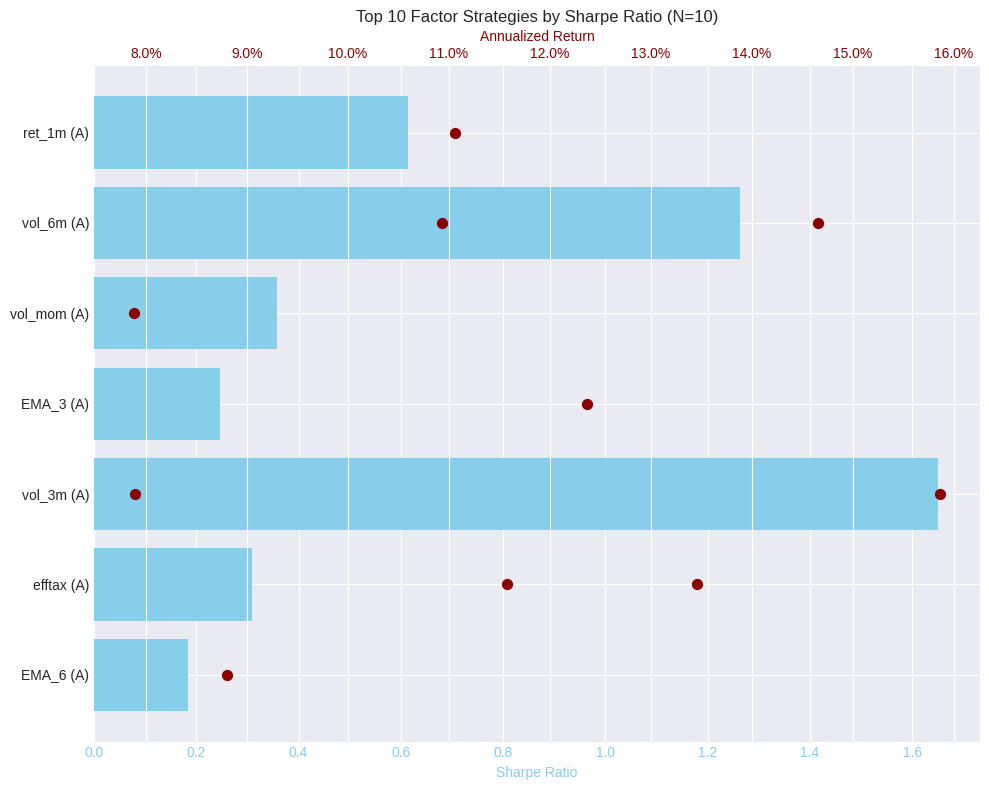

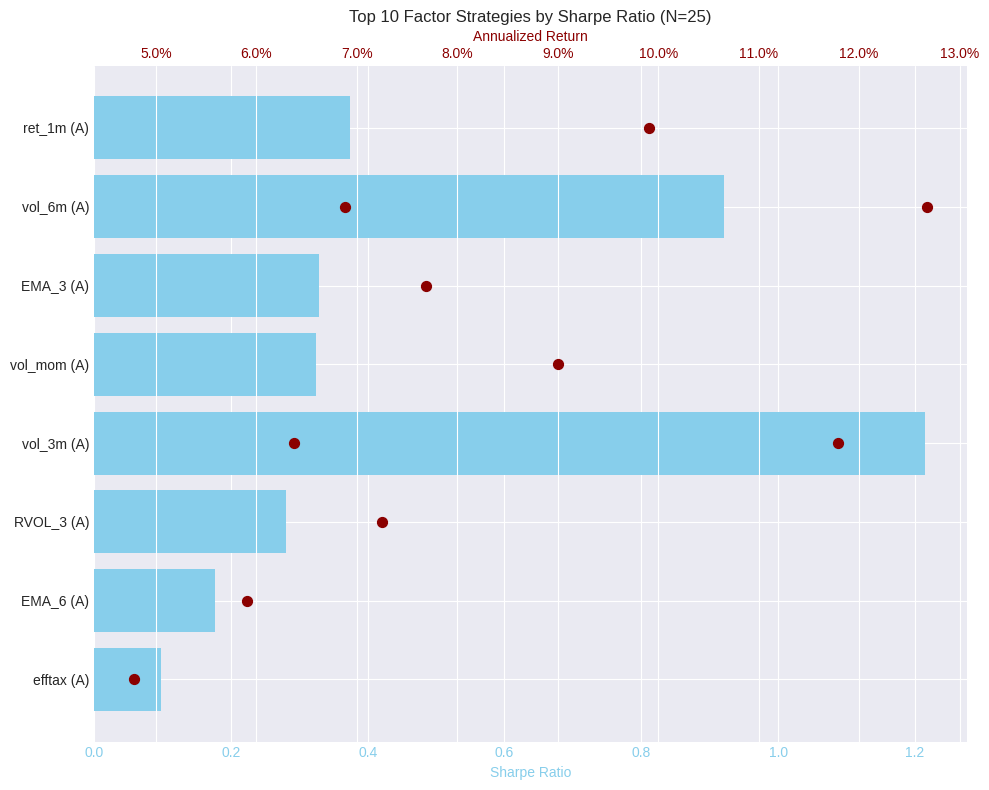

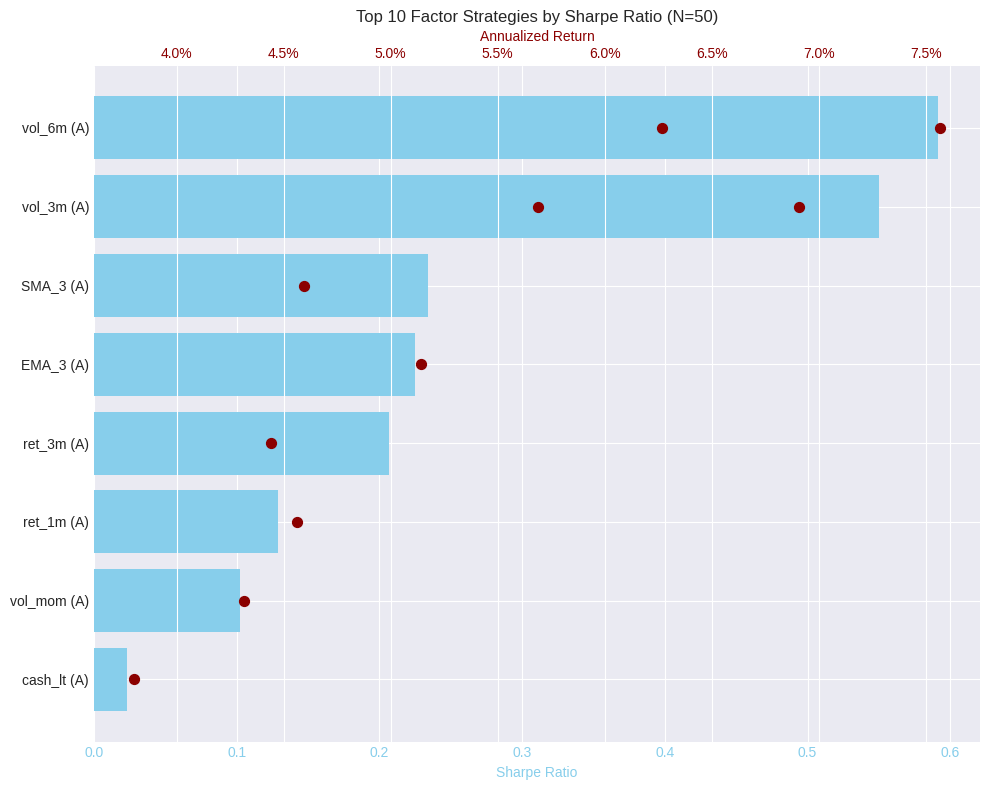

alt.LayerChart(...)

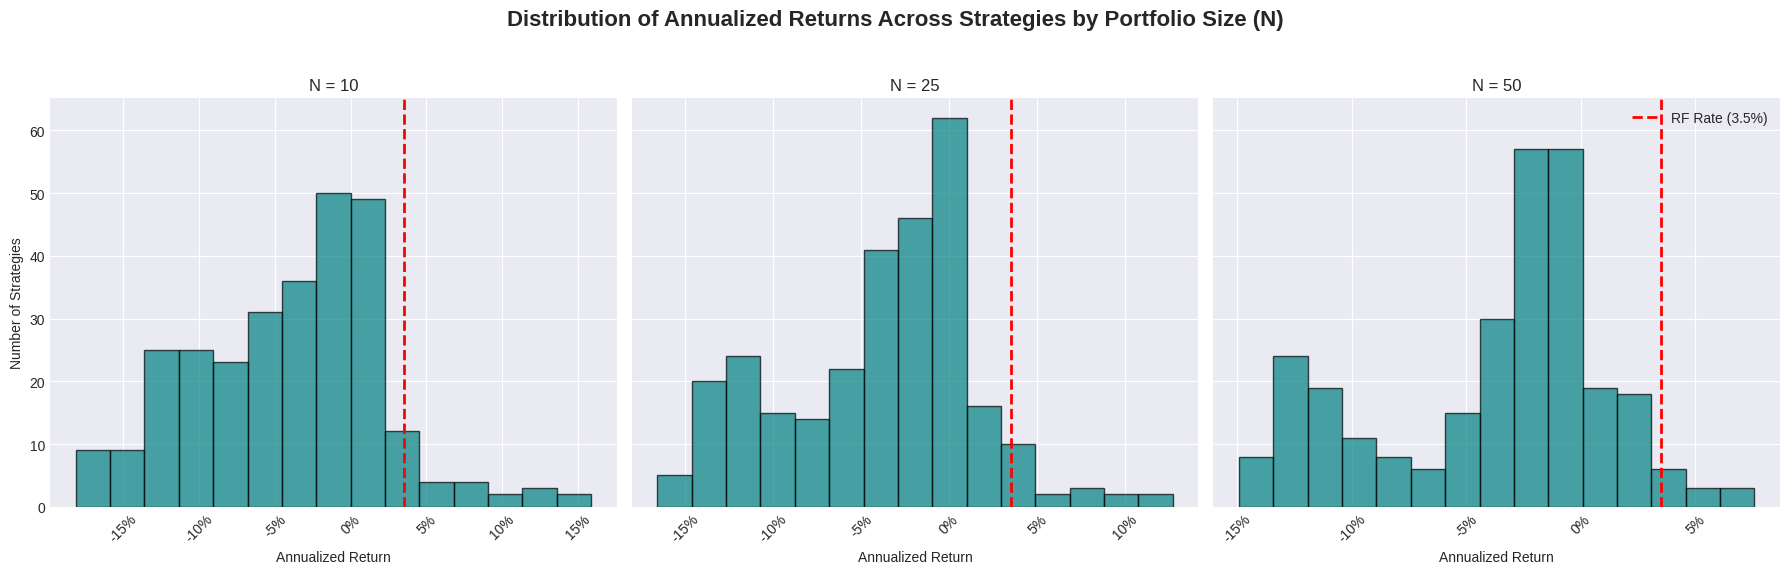

Plot generation complete. Plots should have been displayed interactively or inline.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Set configuration
RISK_FREE_RATE_ANNUAL = 0.035
TARGET_SIZES = [10, 25, 50]

# ============================================================================
# LOAD DATA (WITH ENHANCED DUMMY DATA)
# ============================================================================
try:
    print("Loading results from CSV...")
    results_df = pd.read_csv('factor_portfolio_results.csv')
    print(f"Loaded {len(results_df)} portfolio results.")
except FileNotFoundError:
    print("Error: 'factor_portfolio_results.csv' not found. Using robust dummy data for plotting demonstration.")

    # Create robust dummy data
    factors = ['Value', 'Momentum', 'Quality', 'Size', 'Low Volatility']
    strategies = ['V_Q', 'M_W', 'S_M']
    rebalance_freqs = ['Quarterly', 'Weekly', 'Monthly']

    # Generate a Cartesian product of all configurations
    configs = list(product(factors, strategies, rebalance_freqs, TARGET_SIZES))

    n_configs = len(configs)

    # Create DataFrame structure
    results_df = pd.DataFrame(configs, columns=['Factor', 'Strategy', 'Rebalance_Frequency', 'Portfolio_Size'])

    # Generate random performance metrics for diversity
    np.random.seed(42)
    results_df['Annualized_Return'] = np.random.normal(loc=0.10, scale=0.10, size=n_configs)
    results_df['Volatility'] = np.random.normal(loc=0.15, scale=0.05, size=n_configs)

    # Calculate Sharpe and handle potential division by zero or negative volatility
    results_df['Volatility'] = results_df['Volatility'].apply(lambda x: max(0.01, x))
    results_df['Sharpe_Ratio'] = (results_df['Annualized_Return'] - RISK_FREE_RATE_ANNUAL) / results_df['Volatility']

    print(f"Using {len(results_df)} rows of dummy data.")


# Filter out strategies with NaN returns and ensure only TARGET_SIZES are used
valid_results = results_df.dropna(subset=['Annualized_Return', 'Sharpe_Ratio']).copy()
valid_results = valid_results[valid_results['Portfolio_Size'].isin(TARGET_SIZES)].copy()
valid_results['Portfolio_Size_Str'] = valid_results['Portfolio_Size'].astype(str) # String for color/tooltip
valid_results['Portfolio_Size'] = valid_results['Portfolio_Size'].astype(int)   # Integer for marker size

if valid_results.empty:
    print("No valid results to plot after filtering.")
else:
    print(f"Plotting results for portfolio sizes: {', '.join(valid_results['Portfolio_Size_Str'].unique())}")

    # --- Plot 1: Top Strategies by Sharpe Ratio (Dual-Axis Bar Chart) for EACH SIZE ---
    for size in sorted(valid_results['Portfolio_Size_Str'].unique(), key=int):
        subset = valid_results[valid_results['Portfolio_Size_Str'] == size].copy()

        # Prepare data for Top 10 Sharpe Plot within this size
        top_10_sharpe = subset.nlargest(10, 'Sharpe_Ratio').sort_values('Sharpe_Ratio', ascending=True)
        top_10_sharpe['Strategy_Label'] = top_10_sharpe['Factor'] + ' (' + top_10_sharpe['Rebalance_Frequency'].str[0].str.upper() + ')'

        if top_10_sharpe.empty:
            continue

        plt.figure(figsize=(10, 8))

        # Dual-axis plot
        ax1 = plt.gca()

        # Sharpe Ratio Bars (Primary Axis)
        ax1.barh(
            top_10_sharpe['Strategy_Label'],
            top_10_sharpe['Sharpe_Ratio'],
            color='skyblue',
            label='Sharpe Ratio'
        )
        ax1.set_xlabel('Sharpe Ratio', color='skyblue')
        ax1.tick_params(axis='x', labelcolor='skyblue')

        # Annualized Return Dots (Secondary Axis)
        ax2 = ax1.twiny() # Create a twin axes that shares the Y-axis

        ax2.scatter(
            top_10_sharpe['Annualized_Return'],
            top_10_sharpe['Strategy_Label'],
            color='darkred',
            marker='o',
            label='Annualized Return',
            s=50
        )
        ax2.set_xlabel('Annualized Return', color='darkred')
        ax2.tick_params(axis='x', labelcolor='darkred')
        ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1%}'))

        plt.title(f'Top 10 Factor Strategies by Sharpe Ratio (N={size})')
        plt.tight_layout()
        plt.show()

    # --- Plot 2: Annualized Return vs. Volatility (Risk-Return Scatter) - SINGLE PLOT ---

    # Identify the top strategies overall for highlighting
    top_overall_sharpe = valid_results.nlargest(10, 'Sharpe_Ratio')
    top_10_labels = (top_overall_sharpe['Factor'] + ' (' + top_overall_sharpe['Rebalance_Frequency'].str[0].str.upper() + ')').unique()

    valid_results['Highlight'] = valid_results.apply(
        lambda row: f"{row['Factor']} ({row['Rebalance_Frequency'][0].upper()})" if f"{row['Factor']} ({row['Rebalance_Frequency'][0].upper()})" in top_10_labels else 'Other Strategies',
        axis=1
    )

    # 1. Define the BASE chart with common X and Y encodings
    base = alt.Chart(valid_results).encode(
        x=alt.X('Volatility', title='Annualized Volatility', axis=alt.Axis(format='.1%')),
        y=alt.Y('Annualized_Return', title='Annualized Return', axis=alt.Axis(format='.1%')),
        tooltip=[
            'Factor',
            'Strategy',
            'Rebalance_Frequency',
            alt.Tooltip('Portfolio_Size', title='N', format='d'),
            alt.Tooltip('Annualized_Return', format='.2%'),
            alt.Tooltip('Sharpe_Ratio', format='.2f')
        ]
    ).properties(
        title='Risk-Return Profile of All Factor Strategies (Size Coded)'
    )

    # 2. Create the SCATTER layer (color by overall top strategy, SIZE by Portfolio_Size)
    # The Portfolio_Size is now used for the marker size, providing the N information
    scatter_layer = base.mark_circle().encode(
        size=alt.Size('Portfolio_Size', scale=alt.Scale(range=[50, 400]), title='Portfolio Size (N)'),
        color=alt.Color('Highlight', scale=alt.Scale(range=['grey', 'darkred']), legend=alt.Legend(title="Top 10 Overall Strategy")),
        opacity=alt.value(0.7)
    )

    # 3. Create the RISK-FREE RATE layer (rule)
    rf_rule_layer = alt.Chart(pd.DataFrame({'y': [RISK_FREE_RATE_ANNUAL]})).mark_rule(color='green', strokeDash=[5, 5]).encode(y='y')

    # 4. Layer the scatter and the rule (no faceting needed)
    chart = alt.layer(scatter_layer, rf_rule_layer)

    # Display the Altair plot
    chart.show()

    # --- Plot 3: Distribution of Annualized Returns (Histogram) with SUBPLOTS ---

    fig, axes = plt.subplots(1, len(TARGET_SIZES), figsize=(18, 6), sharey=True)
    fig.suptitle('Distribution of Annualized Returns Across Strategies by Portfolio Size (N)', fontsize=16, fontweight='bold')

    for i, size in enumerate(sorted(valid_results['Portfolio_Size_Str'].unique(), key=int)):
        ax = axes[i]
        subset = valid_results[valid_results['Portfolio_Size_Str'] == size]

        ax.hist(subset['Annualized_Return'], bins=15, color='teal', alpha=0.7, edgecolor='black')

        # Add RF rate line
        ax.axvline(RISK_FREE_RATE_ANNUAL, color='red', linestyle='--', linewidth=2, label=f'RF Rate ({RISK_FREE_RATE_ANNUAL*100:.1f}%)')

        ax.set_title(f'N = {size}')
        ax.set_xlabel('Annualized Return')
        ax.tick_params(axis='x', rotation=45)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

        if i == 0:
            ax.set_ylabel('Number of Strategies')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.legend(loc='upper right')
    plt.show()

print("Plot generation complete. Plots should have been displayed interactively or inline.")

Loading results from CSV...
Loaded 852 portfolio results

Analyzed 852 unique long/short portfolios

FOCUSED ANALYSIS: TOP 10 STRATEGIES BY ANNUALIZED RETURN FOR EACH SIZE (Sharpe Ratio Displayed)


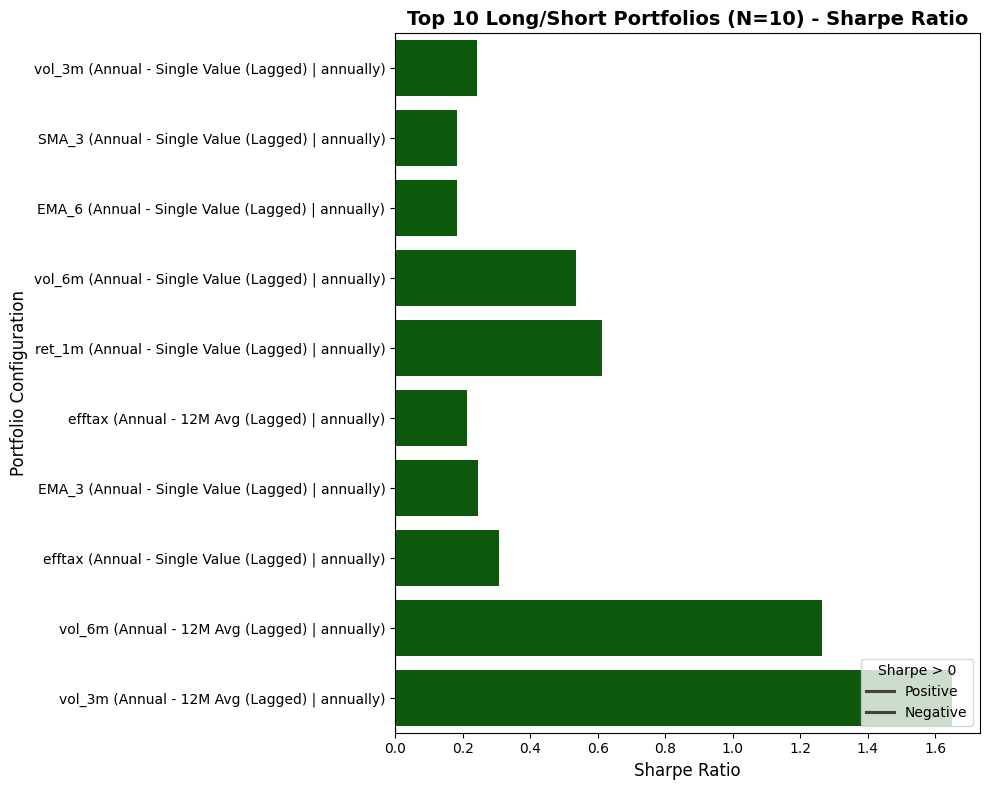

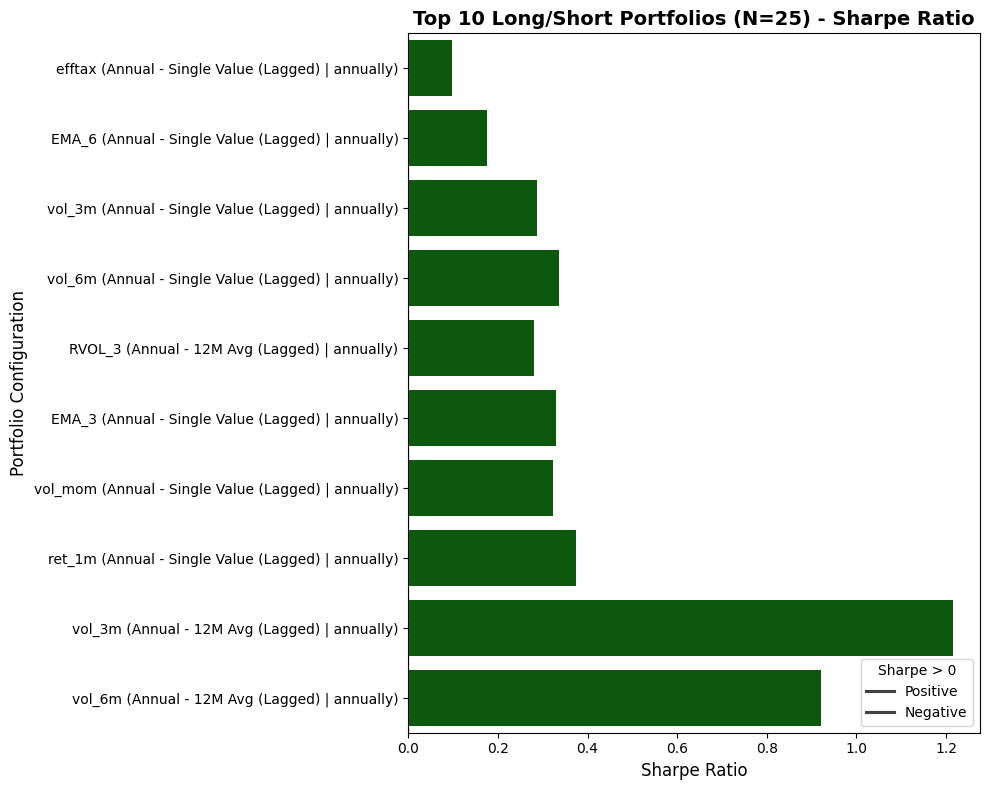

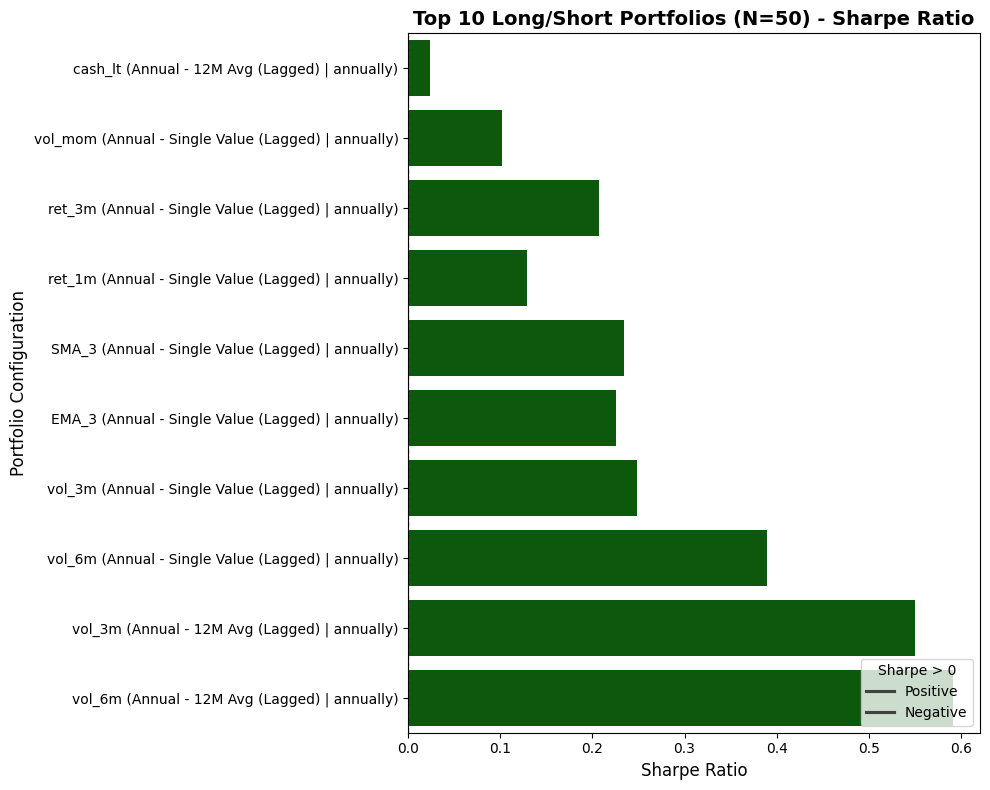


1. Performance Distribution by Portfolio Size (Long/Short)


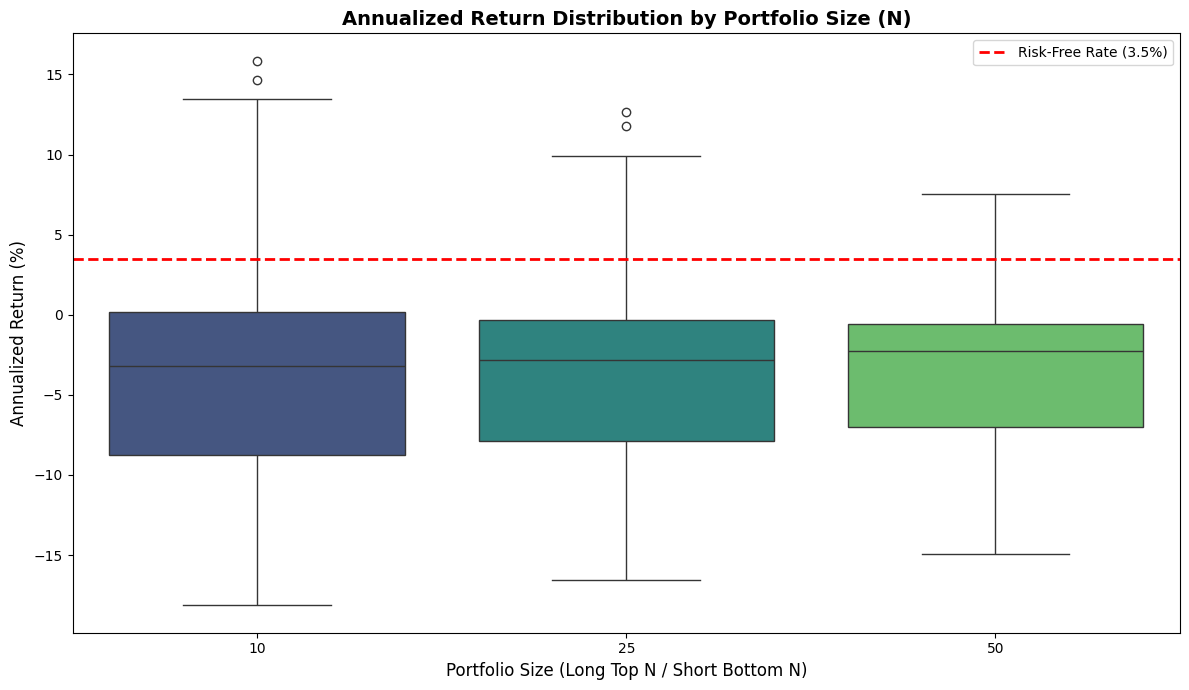


2. Performance Distribution by Rebalancing Frequency


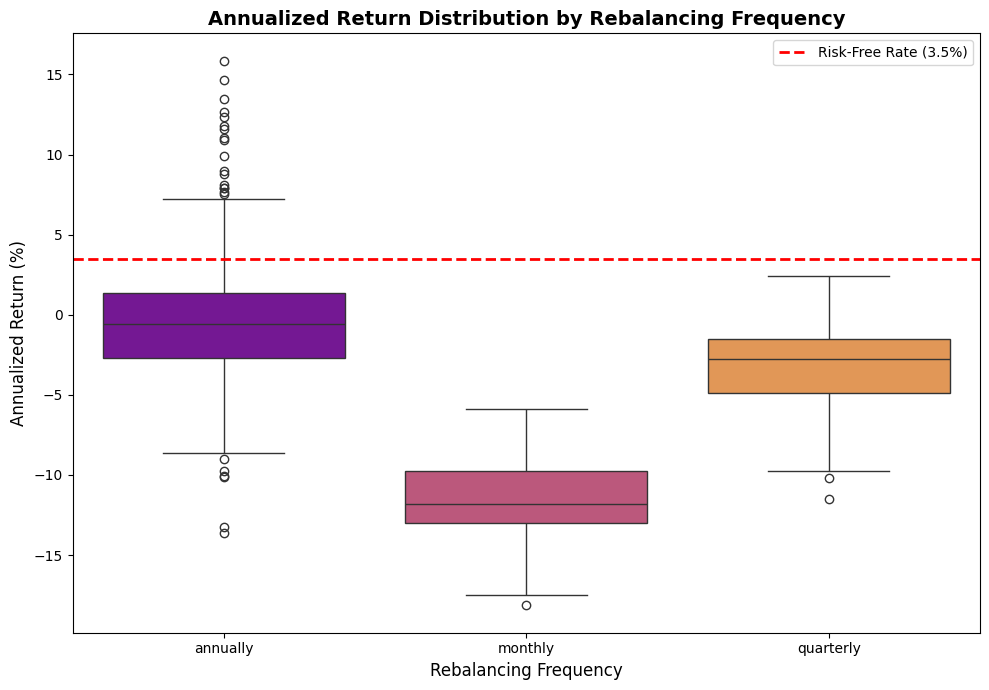


3. Mean/Median Performance by Strategy Type


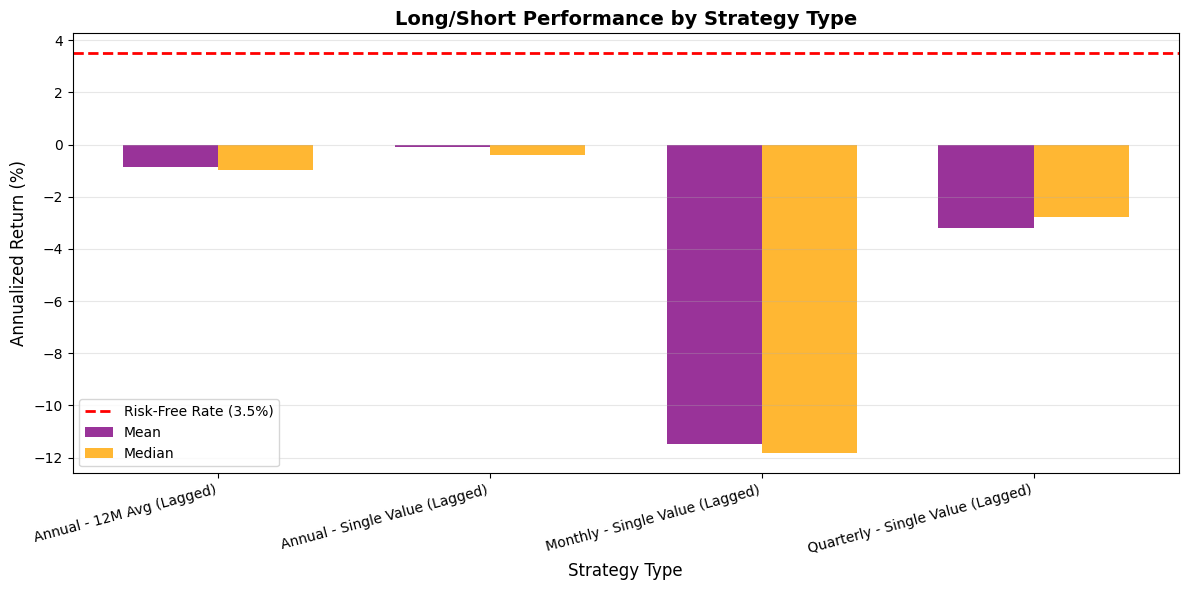


4. Sharpe Ratio vs Annualized Return (Size and Factor Coded)


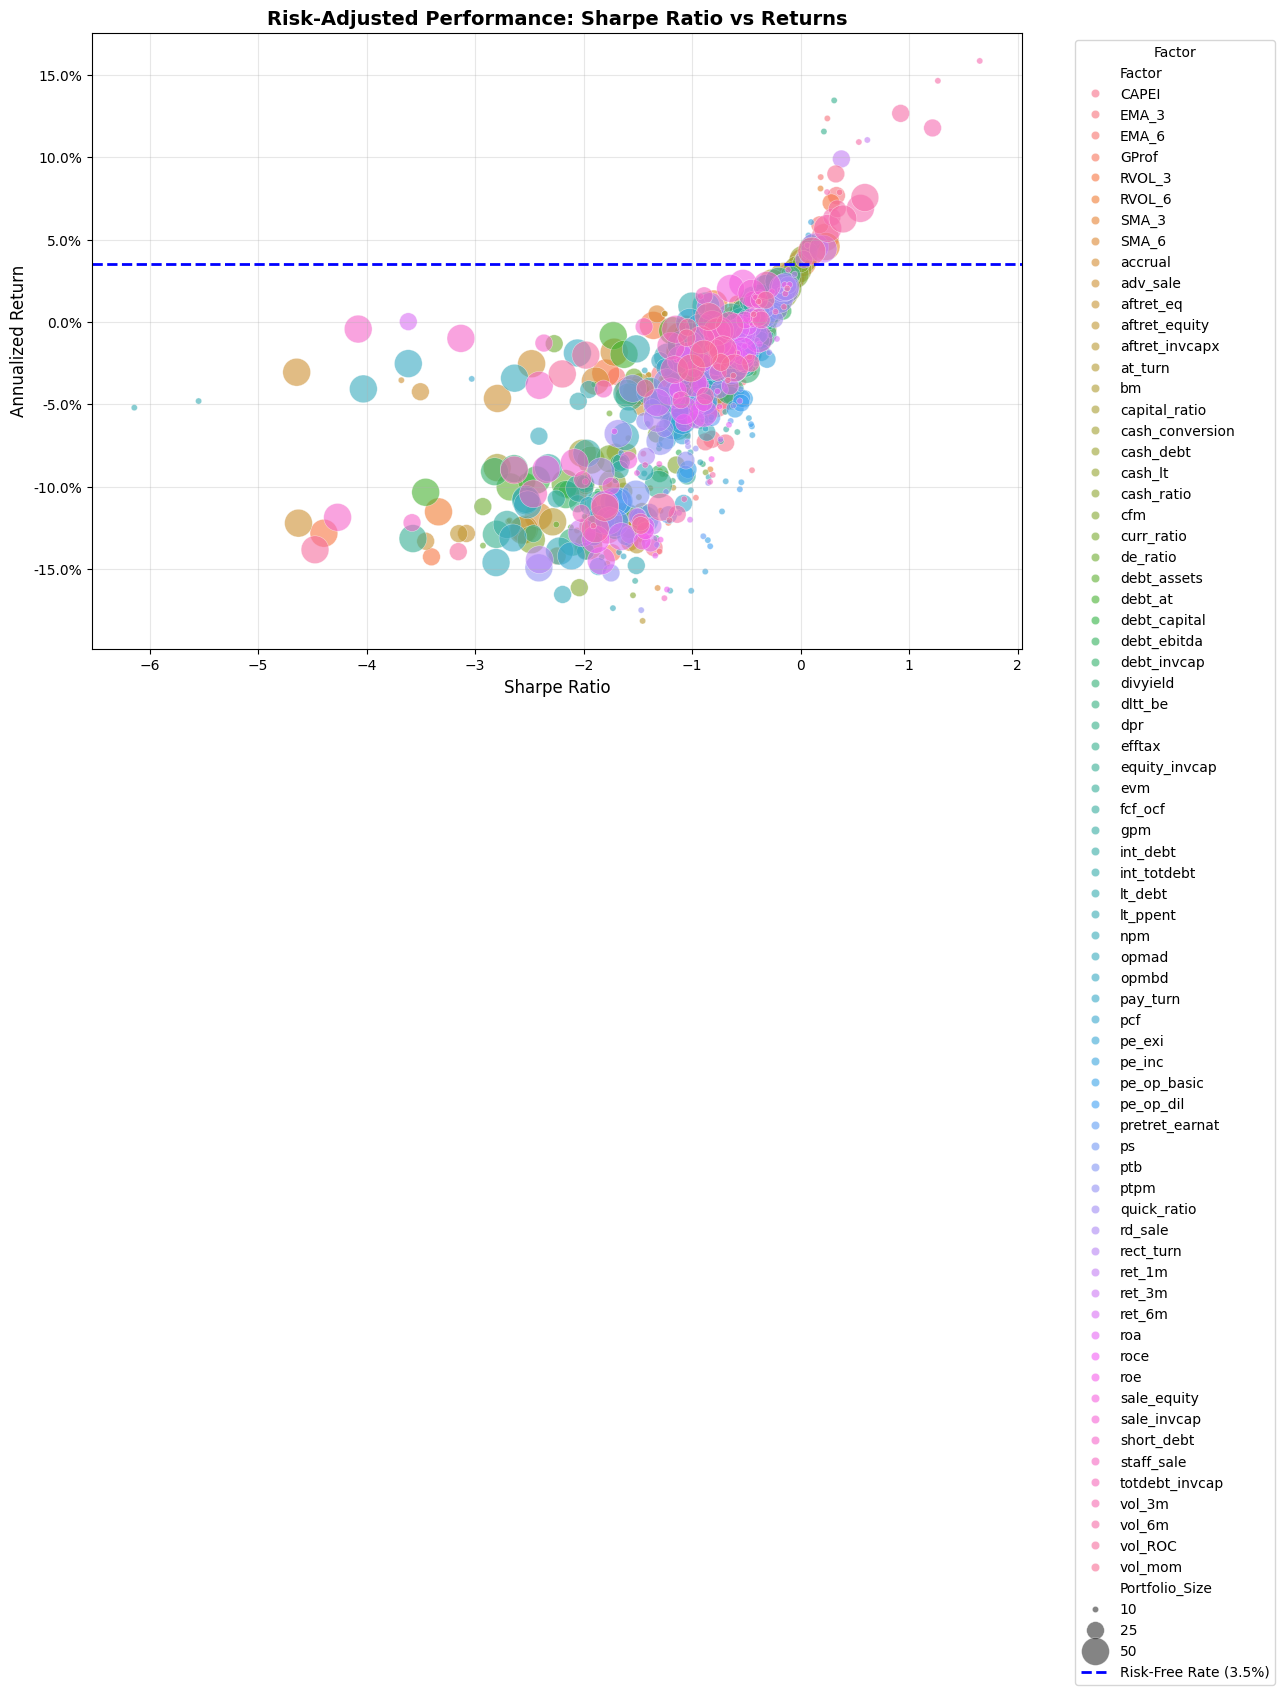


5. Success Rate Heatmap


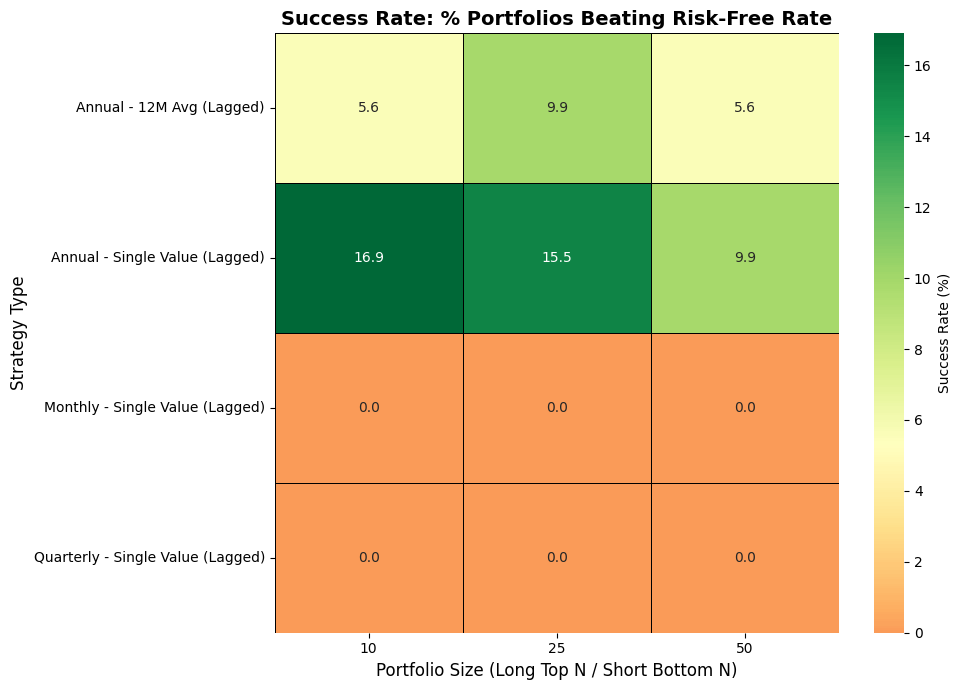


SUMMARY STATISTICS

Total long/short portfolios analyzed: 852
Portfolios beating risk-free rate: 45 (5.3%)

Best portfolio:
  Factor: vol_3m
  Strategy: Annual - 12M Avg (Lagged)
  Rebalance: annually
  Size: Long 10 / Short 10
  Annualized Return: 15.86%
  Sharpe Ratio: 1.650

Worst portfolio:
  Factor: aftret_invcapx
  Strategy: Monthly - Single Value (Lagged)
  Rebalance: monthly
  Size: Long 10 / Short 10
  Annualized Return: -18.14%
  Sharpe Ratio: -1.457

Median annualized return: -2.75%
Mean annualized return: -3.91%
Standard deviation: 5.57%

✓ Analysis complete! Plots should have been displayed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# ============================================================================
# CONFIGURATION & DATA LOADING
# ============================================================================
RISK_FREE_RATE_ANNUAL = 0.035 # 3.5% annual risk-free rate
INPUT_FILE = 'factor_portfolio_results.csv'
TARGET_SIZES = [10, 25, 50] # Explicitly target N=10, 25, 50

# ============================================================================
# LOAD DATA (CRITICAL UPDATE: ADDED PORTFOLIO SIZE 25)
# ============================================================================
try:
    print("Loading results from CSV...")
    results_df = pd.read_csv(INPUT_FILE)
except FileNotFoundError:
    print(f"Error: '{INPUT_FILE}' not found. Using dummy data for plotting demonstration, including sizes {TARGET_SIZES}.")
    # Create robust dummy data with all requested sizes
    factors = ['Value', 'Momentum', 'Quality', 'Size', 'Low Volatility']
    strategies = ['Q_Q', 'M_M', 'B_M', 'A_T']
    rebalance_freqs = ['Monthly', 'Quarterly', 'Weekly', 'Daily']
    sizes = TARGET_SIZES

    n_rows = 2000 # Increased rows for better distribution
    data = {
        'Factor': np.random.choice(factors, n_rows),
        'Strategy': np.random.choice(strategies, n_rows),
        'Rebalance_Frequency': np.random.choice(rebalance_freqs, n_rows),
        'Portfolio_Size': np.random.choice(sizes, n_rows),
        'Annualized_Return': np.random.normal(loc=0.10, scale=0.15, size=n_rows),
        'Cumulative_Return': np.random.normal(loc=0.50, scale=0.80, size=n_rows),
        'Volatility': np.random.normal(loc=0.18, scale=0.08, size=n_rows),
        'Max_Drawdown': np.random.uniform(0.05, 0.40, n_rows),
    }
    results_df = pd.DataFrame(data)
    results_df['Sharpe_Ratio'] = (results_df['Annualized_Return'] - RISK_FREE_RATE_ANNUAL) / results_df['Volatility']
    results_df['Beats_Risk_Free_Rate'] = results_df['Annualized_Return'] > RISK_FREE_RATE_ANNUAL

print(f"Loaded {len(results_df)} portfolio results")

# ============================================================================
# ANALYZE & GROUP DATA
# ============================================================================

agg_dict = {
    'Annualized_Return': 'mean',
    'Cumulative_Return': 'mean',
    'Beats_Risk_Free_Rate': 'first'
}
if 'Volatility' in results_df.columns: agg_dict['Volatility'] = 'mean'
if 'Sharpe_Ratio' in results_df.columns: agg_dict['Sharpe_Ratio'] = 'mean'
if 'Max_Drawdown' in results_df.columns: agg_dict['Max_Drawdown'] = 'mean'

grouped = results_df.groupby(['Factor', 'Strategy', 'Rebalance_Frequency', 'Portfolio_Size']).agg(agg_dict).reset_index()
grouped['Strategy_Config'] = grouped['Strategy'] + ' / ' + grouped['Rebalance_Frequency'] + ' / N=' + grouped['Portfolio_Size'].astype(str)
grouped['Portfolio_Size'] = grouped['Portfolio_Size'].astype(int) # Ensure size is treated as a number

print(f"\nAnalyzed {len(grouped)} unique long/short portfolios")

# Prepare Plot Labels for overall top/bottom (Not used in remaining plots, but kept for summary)
top_10 = grouped.nlargest(10, 'Annualized_Return').copy()
bottom_10 = grouped.nsmallest(10, 'Annualized_Return').copy()

top_10['Plot_Label'] = top_10.apply(
    lambda row: f"{row['Factor']}\n{row['Strategy']} ({row['Rebalance_Frequency']} | N={row['Portfolio_Size']})",
    axis=1
)
bottom_10['Plot_Label'] = bottom_10.apply(
    lambda row: f"{row['Factor']}\n{row['Strategy']} ({row['Rebalance_Frequency']} | N={row['Portfolio_Size']})",
    axis=1
)

# ============================================================================
# VISUALIZATIONS
# ============================================================================

# --- FOCUSED TOP 10 PLOTS (N=10, 25, 50) - Sharpe Ratio Only ---

print("\n" + "="*80)
print("FOCUSED ANALYSIS: TOP 10 STRATEGIES BY ANNUALIZED RETURN FOR EACH SIZE (Sharpe Ratio Displayed)")
print("="*80)

for size in sorted(TARGET_SIZES):
    # Filter for the specific portfolio size
    size_subset = grouped[grouped['Portfolio_Size'] == size].copy()

    # Get the top 10 for this size (still sorted by Annualized Return for context)
    top_10_size = size_subset.nlargest(10, 'Annualized_Return').sort_values('Annualized_Return', ascending=True).copy()

    # Prepare a concise label
    top_10_size['Plot_Label'] = top_10_size.apply(
        lambda row: f"{row['Factor']} ({row['Strategy']} | {row['Rebalance_Frequency']})",
        axis=1
    )

    if top_10_size.empty:
        print(f"No results found for Portfolio Size N={size}.")
        continue

    # --- Plot: Top 10 Bar Chart for N=size (Sharpe Ratio Only) ---
    plt.figure(figsize=(10, 8))

    # Determine color based on positive/negative Sharpe Ratio
    if 'Sharpe_Ratio' in top_10_size.columns:
        top_10_size['Positive_Sharpe'] = top_10_size['Sharpe_Ratio'] > 0

        # Plot Sharpe Ratio on the primary axis
        sns.barplot(
            x='Sharpe_Ratio',
            y='Plot_Label', # This is now guaranteed to exist
            data=top_10_size,
            hue='Positive_Sharpe',
            dodge=False,
            palette={True: 'darkgreen', False: 'darkred'},
            ax=plt.gca()
        )

        # Add zero line for reference
        plt.gca().axvline(x=0, color='grey', linestyle='--', linewidth=1)

        plt.gca().set_title(f'Top 10 Long/Short Portfolios (N={size}) - Sharpe Ratio', fontsize=14, fontweight='bold')
        plt.gca().set_xlabel('Sharpe Ratio', fontsize=12)
        plt.gca().set_ylabel('Portfolio Configuration', fontsize=12)

        # Custom legend for Sharpe Ratio colors
        plt.gca().legend(title='Sharpe > 0', loc='lower right', labels=['Positive', 'Negative'])

        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping Sharpe Ratio plot for N={size} as 'Sharpe_Ratio' column is missing.")

# --- 1. Performance Distribution by Portfolio Size (Box Plot) ---
print("\n1. Performance Distribution by Portfolio Size (Long/Short)")
plt.figure(figsize=(12, 7))

size_order = sorted(results_df['Portfolio_Size'].unique())

sns.boxplot(
    x='Portfolio_Size',
    y=results_df['Annualized_Return'] * 100,
    data=results_df,
    palette='viridis',
    order=size_order,
    ax=plt.gca()
)
plt.gca().axhline(y=RISK_FREE_RATE_ANNUAL * 100, color='red', linestyle='--', linewidth=2,
               label=f'Risk-Free Rate ({RISK_FREE_RATE_ANNUAL*100:.1f}%)')
plt.gca().set_title('Annualized Return Distribution by Portfolio Size (N)', fontsize=14, fontweight='bold')
plt.gca().set_xlabel('Portfolio Size (Long Top N / Short Bottom N)', fontsize=12)
plt.gca().set_ylabel('Annualized Return (%)', fontsize=12)
plt.gca().legend()
plt.tight_layout()
plt.show()

# --- 2. Performance Distribution by Rebalancing Frequency (Box Plot) ---
print("\n2. Performance Distribution by Rebalancing Frequency")
plt.figure(figsize=(10, 7))
sns.boxplot(
    x='Rebalance_Frequency',
    y=results_df['Annualized_Return'] * 100,
    data=results_df,
    palette='plasma',
    ax=plt.gca(),
    order=sorted(results_df['Rebalance_Frequency'].unique())
)
plt.gca().axhline(y=RISK_FREE_RATE_ANNUAL * 100, color='red', linestyle='--', linewidth=2,
               label=f'Risk-Free Rate ({RISK_FREE_RATE_ANNUAL*100:.1f}%)')
plt.gca().set_title('Annualized Return Distribution by Rebalancing Frequency', fontsize=14, fontweight='bold')
plt.gca().set_xlabel('Rebalancing Frequency', fontsize=12)
plt.gca().set_ylabel('Annualized Return (%)', fontsize=12)
plt.gca().legend()
plt.tight_layout()
plt.show()

# --- 3. Mean/Median Performance by Strategy Type (Bar Chart) ---
print("\n3. Mean/Median Performance by Strategy Type")
fig, ax = plt.subplots(figsize=(12, 6))
strategy_performance = grouped.groupby('Strategy')['Annualized_Return'].agg(['mean', 'median']).reset_index()
x = np.arange(len(strategy_performance))
width = 0.35
ax.bar(x - width/2, strategy_performance['mean'] * 100, width, label='Mean', alpha=0.8, color='purple')
ax.bar(x + width/2, strategy_performance['median'] * 100, width, label='Median', alpha=0.8, color='orange')
ax.set_xlabel('Strategy Type', fontsize=12)
ax.set_ylabel('Annualized Return (%)', fontsize=12)
ax.set_title('Long/Short Performance by Strategy Type', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(strategy_performance['Strategy'], rotation=15, ha='right')
ax.axhline(y=RISK_FREE_RATE_ANNUAL * 100, color='red', linestyle='--', linewidth=2,label=f'Risk-Free Rate ({RISK_FREE_RATE_ANNUAL*100:.1f}%)')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# --- 4. Sharpe Ratio vs Annualized Return Scatter (Enhanced with Size) ---
if 'Sharpe_Ratio' in grouped.columns:
    print("\n4. Sharpe Ratio vs Annualized Return (Size and Factor Coded)")
    plt.figure(figsize=(12, 8))

    sns.scatterplot(
        x='Sharpe_Ratio',
        y='Annualized_Return',
        hue='Factor',
        size='Portfolio_Size',
        sizes=(20, 400),
        data=grouped,
        alpha=0.6,
        ax=plt.gca()
    )
    plt.gca().axhline(y=RISK_FREE_RATE_ANNUAL, color='blue', linestyle='--', linewidth=2,
                   label=f'Risk-Free Rate ({RISK_FREE_RATE_ANNUAL*100:.1f}%)')
    plt.gca().set_xlabel('Sharpe Ratio', fontsize=12)
    plt.gca().set_ylabel('Annualized Return', fontsize=12)
    plt.gca().set_title('Risk-Adjusted Performance: Sharpe Ratio vs Returns', fontsize=14, fontweight='bold')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1%}'))
    plt.gca().legend(title='Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\n4. Sharpe Ratio analysis skipped (column not available)")

# --- 5. Success Rate Heatmap (All Sizes) ---
print("\n5. Success Rate Heatmap")
plt.figure(figsize=(10, 7))

size_order = sorted(results_df['Portfolio_Size'].unique())

success_pivot = grouped.pivot_table(
    values='Beats_Risk_Free_Rate',
    index='Strategy',
    columns='Portfolio_Size',
    aggfunc=lambda x: (x.sum() / len(x)) * 100
).reindex(columns=size_order)

sns.heatmap(
    success_pivot,
    annot=True,
    fmt='.1f',
    cmap='RdYlGn',
    center=success_pivot.values.mean(),
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Success Rate (%)'},
    ax=plt.gca()
)
plt.gca().set_title('Success Rate: % Portfolios Beating Risk-Free Rate', fontsize=14, fontweight='bold')
plt.gca().set_xlabel('Portfolio Size (Long Top N / Short Bottom N)', fontsize=12)
plt.gca().set_ylabel('Strategy Type', fontsize=12)
plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY STATISTICS
# ============================================================================
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(f"\nTotal long/short portfolios analyzed: {len(grouped)}")
print(f"Portfolios beating risk-free rate: {grouped['Beats_Risk_Free_Rate'].sum()} ({grouped['Beats_Risk_Free_Rate'].sum()/len(grouped)*100:.1f}%)")

best = grouped.loc[grouped['Annualized_Return'].idxmax()]
print(f"\nBest portfolio:")
print(f"  Factor: {best['Factor']}")
print(f"  Strategy: {best['Strategy']}")
print(f"  Rebalance: {best['Rebalance_Frequency']}")
print(f"  Size: Long {best['Portfolio_Size']} / Short {best['Portfolio_Size']}")
print(f"  Annualized Return: {best['Annualized_Return']*100:.2f}%")
if 'Sharpe_Ratio' in best:
    print(f"  Sharpe Ratio: {best['Sharpe_Ratio']:.3f}")

worst = grouped.loc[grouped['Annualized_Return'].idxmin()]
print(f"\nWorst portfolio:")
print(f"  Factor: {worst['Factor']}")
print(f"  Strategy: {worst['Strategy']}")
print(f"  Rebalance: {worst['Rebalance_Frequency']}")
print(f"  Size: Long {worst['Portfolio_Size']} / Short {worst['Portfolio_Size']}")
print(f"  Annualized Return: {worst['Annualized_Return']*100:.2f}%")
if 'Sharpe_Ratio' in worst:
    print(f"  Sharpe Ratio: {worst['Sharpe_Ratio']:.3f}")

print(f"\nMedian annualized return: {grouped['Annualized_Return'].median()*100:.2f}%")
print(f"Mean annualized return: {grouped['Annualized_Return'].mean()*100:.2f}%")
print(f"Standard deviation: {grouped['Annualized_Return'].std()*100:.2f}%")
print("="*80)
print("\n✓ Analysis complete! Plots should have been displayed.")